In [1]:
import keras.utils.np_utils
import tensorflow as tf

import tensorflow_datasets as tfds

tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'booksum',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'cs_restaurants',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adr

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

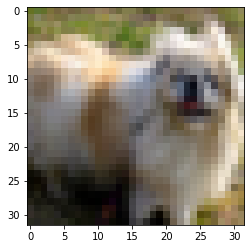

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[40])

In [4]:
from sklearn.model_selection import  train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05, random_state=0)

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

def normalize(data):
    data = data.astype("float32")
    data = data/255.0
    return data

x_train = normalize(x_train)
datagen.fit(x_train)
x_val = normalize(x_val)
datagen.fit(x_val)

x_test = normalize(x_test)

In [7]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_val = to_categorical(y_val, 10)

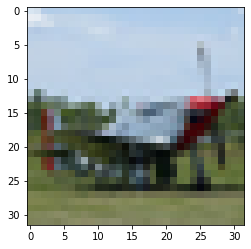

In [8]:
plt.imshow(x_train[40])

In [25]:
def result(model):
    epoch = 20
    r = model.fit(x_train, y_train, batch_size=32, epochs=epoch, validation_data=(x_val, y_val), verbose=1)
    acc = model.evaluate(x_test, y_test)
    print((acc[0], acc[1] * 100))

    epoch_range = range(1, epoch+1)

    plt.plot(epoch_range, r.history['accuracy'])
    plt.plot(epoch_range, r.history['val_accuracy'])
    plt.title("Classification accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Val"], loc="lower right")
    plt.show()

    plt.plot(epoch_range, r.history['loss'])
    plt.plot(epoch_range, r.history['val_loss'])
    plt.title("Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Val"], loc="lower right")
    plt.show()

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

from keras.preprocessing.image import load_img, img_to_array

def predict_class(filename, model):
    img = load_img(filename, target_size=(32,32))
    plt.show(img)

    img=img_to_array(img)

    img = img.reshape(1, 32, 32, 3)

    img = img.astype('float32')
    img = img/255.0

    result = model.predict(img)

    dict2 = {}
    for i in range(10):
        dict2[result[0][i]] = classes[i]

    res = result[0]
    res.sort()

    res = res[::-1]

    results = res[:3]

    for i in range(3):
        print("{} : {}".format(dict2[results[i]], ((results[i]*100).round(2))))

2022-02-25 18:03:50.291612: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


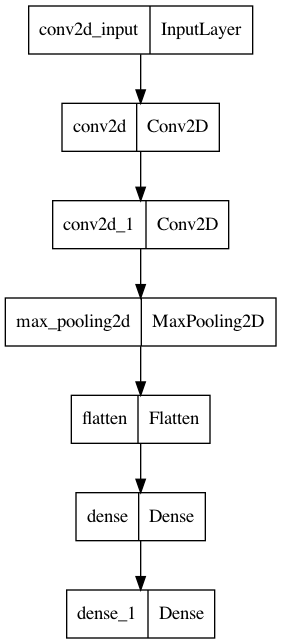

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization



model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation=('relu'), padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

from keras.utils.vis_utils import plot_model

plot_model(model_1)

In [21]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [22]:
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
result(model_1)

Epoch 1/20
1485/1485 [==============================] - 42s 28ms/step - loss: 1.8413 - accuracy: 0.3445 - val_loss: 1.6293 - val_accuracy: 0.4176
Epoch 2/20
1485/1485 [==============================] - 45s 30ms/step - loss: 1.4990 - accuracy: 0.4688 - val_loss: 1.3925 - val_accuracy: 0.4960
Epoch 3/20
1485/1485 [==============================] - 46s 31ms/step - loss: 1.3461 - accuracy: 0.5237 - val_loss: 1.2781 - val_accuracy: 0.5400
Epoch 4/20
1485/1485 [==============================] - 46s 31ms/step - loss: 1.2168 - accuracy: 0.5705 - val_loss: 1.1588 - val_accuracy: 0.5920
Epoch 5/20
1485/1485 [==============================] - 46s 31ms/step - loss: 1.1140 - accuracy: 0.6104 - val_loss: 1.1280 - val_accuracy: 0.5984
Epoch 6/20
1485/1485 [==============================] - 47s 32ms/step - loss: 1.0250 - accuracy: 0.6417 - val_loss: 1.0865 - val_accuracy: 0.6216
Epoch 7/20
1485/1485 [==============================] - 52s 35ms/step - loss: 0.9468 - accuracy: 0.6688 - val_loss: 1.0375 -

AttributeError: 'Sequential' object has no attribute 'evaulate'

In [27]:
model_1.save('image-classification.h5')

import urllib
resource = urllib.request.urlopen("https://raw.githubusercontent.com/Apress/artificial-neural-networks-with-tensorflow-2/main/ch03/test01.png")
output = open("file01.jpg", "wb")
output.write(resource.read())

output.close()
predict_class("file01.jpg", model_1)

deer : 67.6
airplane : 30.57
horse : 1.58


In [33]:
open("model.json", "wb").write(bytes(model_1.to_json(), 'utf8'))

2620